In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import salem
import swiss_uhi_utils as suhi
import xarray as xr

from lausanne_greening_scenarios import utils

In [2]:
metrics = ['proportion_of_landscape', 'area_mn', 'shape_index_am', 'edge_density', 'largest_patch_index']

In [3]:
biophysical_table_filepath = '../data/processed/biophysical-table.csv'
lulc_raster_filepath = '../data/processed/agglom-lulc.tif'
# t_da_filepath = '../data/interim/lst-da.nc'
t_da_filepath = '../data/processed/tair-ucm.nc'

In [4]:
ls, ls_meta = utils.get_reclassif_landscape(
    lulc_raster_filepath, biophysical_table_filepath)

In [5]:
lulc_da = salem.open_xr_dataset(lulc_raster_filepath)['data']
t_da = suhi.align_ds(xr.open_dataarray(t_da_filepath), lulc_da)

In [6]:
ba = utils.get_buffer_analysis(ls, ls_meta)

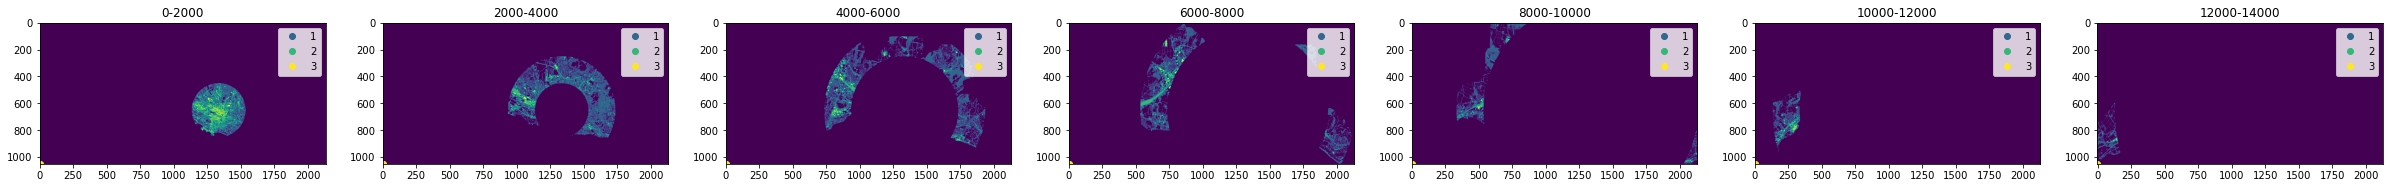

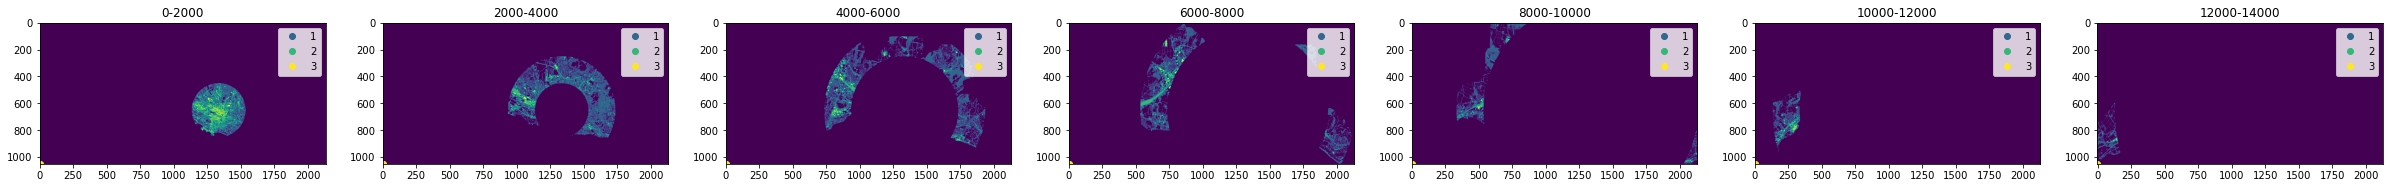

In [7]:
ba.plot_landscapes()

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'time = 2019-08-25'}, xlabel='buffer_dist', ylabel='T'>

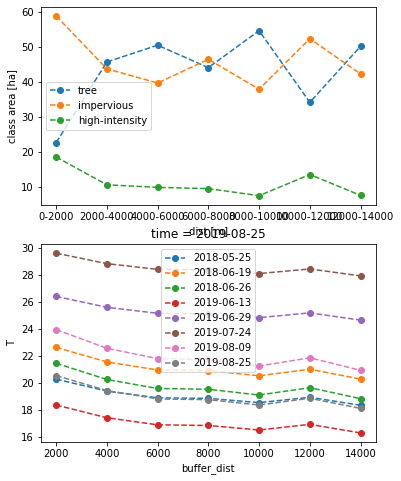

In [8]:
# prepare the figure
figwidth, figheight = plt.rcParams['figure.figsize']
fig, (ax_top, ax_bottom) = plt.subplots(2,
                                        1,
                                        figsize=(figwidth, 2 * figheight))

utils.plot_class_cover(ba, ax_top)
utils.plot_mean_buffer_t(ba, t_da, lulc_da, ax_bottom)

In [8]:
hottest_day_da = t_da.isel(time=t_da.groupby('time').max(dim=['x', 'y']).argmax())
t_arr = hottest_day_da.values

In [40]:
def get_regression_summary(ls, ls_meta, zone_pixel_width, zone_pixel_height,
                           t_arr, metrics):
    zga = utils.get_zonal_grid_analysis(ls,
                                        ls_meta,
                                        zone_pixel_width=zone_pixel_width,
                                        zone_pixel_height=zone_pixel_height)
    t_arrs = utils.get_zonal_grid_t_arrs(t_arr, zga)
    metrics_df = zga.compute_class_metrics_df(metrics=metrics).apply(
        pd.to_numeric)
    return utils.get_linear_regression_summary(metrics_df, utils.TREE_CLASS,
                                               t_arrs)

In [41]:
get_regression_summary(ls, ls_meta, 30, 30, t_arr, metrics)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      t   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          2.85e-113
Time:                        14:29:29   Log-Likelihood:                -769.93
No. Observations:                1068   AIC:                             1552.
Df Residuals:                    1062   BIC:                             1582.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      28.6218      0.046    624.064      0.000      28.532      28.712
proportion_of_landscape    -0.0159      0.001    -11.496      0.000      -0.019      -0.013
area_mn                     0.0439      0.018      2.509      0.012       0.010       0.078
shape_index_am              0.2019      0.030      6.663      0.000       0.142       0.261
edge_density                0.0025      0.000      8.915      0.000       0.002       0.003
largest_patch_index         0.0006      0.002      0.341      0.733      -0.003       0.004
==============================================================================
Omnibus:                       34.924   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.857
Skew:                           0.050   Prob(JB):                     0.000219
Kurtosis:                       2.393   Cond. No.                         396.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
utils.get_linear_regression_summary(metrics_df, utils.TREE_CLASS, t_arrs)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      t   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     45.74
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           4.97e-33
Time:                        14:10:13   Log-Likelihood:                -145.71
No. Observations:                 245   AIC:                             303.4
Df Residuals:                     239   BIC:                             324.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      28.7300      0.085    338.309      0.000      28.563      28.897
proportion_of_landscape    -0.0218      0.003     -8.249      0.000      -0.027      -0.017
area_mn                     0.1158      0.071      1.629      0.105      -0.024       0.256
shape_index_am              0.1094      0.042      2.628      0.009       0.027       0.191
edge_density                0.0040      0.001      6.123      0.000       0.003       0.005
largest_patch_index         0.0044      0.004      1.134      0.258      -0.003       0.012
==============================================================================
Omnibus:                        3.180   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                2.360
Skew:                          -0.076   Prob(JB):                        0.307
Kurtosis:                       2.544   Cond. No.                         359.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
get_regression_summary(ls, ls_meta, 100, 100, t_arr, metrics)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      t   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     25.33
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           2.49e-14
Time:                        14:29:44   Log-Likelihood:                -23.837
No. Observations:                  74   AIC:                             59.67
Df Residuals:                      68   BIC:                             73.50
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      29.0033      0.141    205.899      0.000      28.722      29.284
proportion_of_landscape    -0.0261      0.004     -6.942      0.000      -0.034      -0.019
area_mn                     0.2940      0.195      1.505      0.137      -0.096       0.684
shape_index_am              0.0435      0.043      0.999      0.321      -0.043       0.130
edge_density                0.0047      0.001      4.130      0.000       0.002       0.007
largest_patch_index         0.0064      0.006      1.134      0.261      -0.005       0.018
==============================================================================
Omnibus:                        2.683   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.198
Skew:                          -0.291   Prob(JB):                        0.333
Kurtosis:                       2.388   Cond. No.                         542.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
zga = utils.get_zonal_grid_analysis(ls, ls_meta, zone_pixel_width=100, zone_pixel_height=100)

In [9]:
t_arrs = utils.get_zonal_grid_t_arrs(t_arr, zga)

In [31]:
metrics_df = zga.compute_class_metrics_df(metrics=metrics).apply(pd.to_numeric)

In [47]:
import numpy as np
class_val = utils.TREE_CLASS
zonal_t_arrs = t_arrs
df = metrics_df.iloc[metrics_df.index.get_level_values('class_val') == class_val].droplevel(0)
df['t'] = np.mean(zonal_t_arrs, axis=(1, 2))

In [68]:
corr_df = pd.DataFrame(index=['r', 'p'], columns=metrics[1:])
for metric in metrics[1:]:
    corr_df[metric] = pg.partial_corr(data=df, y='t', x=metric, covar='proportion_of_landscape')[['r', 'p-val']].values.flatten()

In [69]:
corr_df

,area_mn,shape_index_am,edge_density,largest_patch_index
r,0.074103,3.191455e-01,3.937997e-01,0.062467
p,0.247861,3.326044e-07,1.630972e-10,0.330195


In [70]:
pg.partial_corr(data=df, y='t', x='proportion_of_landscape', covar=metrics[1:])[['r', 'p-val']]

,r,p-val
pearson,-0.470748,6.468129e-15


In [83]:
list(map(lambda x: float(x.split('-')[-1]), ba.buffer_dists))

[1000.0, 3000.0, 5000.0, 7000.0, 9000.0, 11000.0, 13000.0, 15000.0]

In [80]:
buffer_dists

array([ 1000,  3000,  5000,  7000,  9000, 11000, 13000, 15000])

In [75]:
buffer_dists = utils.BUFFER_DISTS
ba = utils.get_buffer_analysis(ls, ls_meta)

In [76]:
buffer_masks_da = suhi.align_ds(xr.DataArray(
    ba.masks_arr.astype(np.uint8),
    dims=('buffer_dist', *lulc_da.dims),
    coords={
        'buffer_dist': buffer_dists,
        **lulc_da.coords
    },
    attrs=lulc_da.attrs),
                                t_da,
                                interp='nearest')

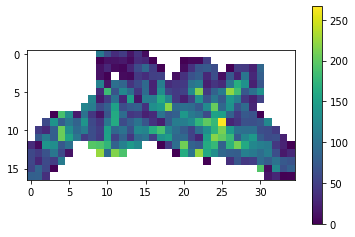

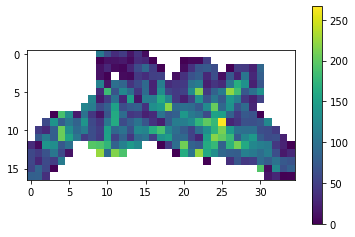

In [14]:
plt.imshow(zga.compute_zonal_statistics_arr('edge_density', class_val=utils.TREE_CLASS))
plt.colorbar()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylandstats as pls
import rasterio as rio
import salem
import xarray as xr
from shapely import geometry

from lausanne_greening_scenarios import utils

NODATA_CLASS = 0
TREE_CLASS = 1
IMPERVIOUS_CLASS = 2
HIGH_INTENSITY_CLASS = 3

LABEL_DICT = {
    TREE_CLASS: 'tree',
    IMPERVIOUS_CLASS: 'impervious',
    HIGH_INTENSITY_CLASS: 'high-intensity'
}

BASE_MASK = geometry.Point(6.6327025, 46.5218269)
BUFFER_DISTS = np.arange(1000, 15000, 1000)


def plot_radial_analysis(biophysical_table_filepath,
                         lulc_raster_filepath,
                         t_da_filepath,
                         base_mask=None,
                         buffer_dists=None,
                         buffer_rings=True):
    # process the args
    if base_mask is None:
        base_mask = BASE_MASK
    if buffer_dists is None:
        buffer_dists = BUFFER_DISTS
    # prepare the figure
    figwidth, figheight = plt.rcParams['figure.figsize']
    fig, (ax_left, ax_right) = plt.subplots(2,
                                            1,
                                            figsize=(figwidth, 2 * figheight))

    # left plot: class cover
    # 1. read the data inputs
    biophysical_df = pd.read_csv(biophysical_table_filepath)
    with rio.open(lulc_raster_filepath) as src:
        lulc_arr = src.read(1)
        lulc_res = src.res
        lulc_meta = src.meta
    # 2. reclassify the LULC according to tree cover/impervious surfaces
    reclassif_arr = np.full_like(lulc_arr, NODATA_CLASS)
    for criterion, class_val in zip([
            biophysical_df['shade'] > .75,
        (biophysical_df['green_area'] == 0) & (biophysical_df['shade'] < .75),
            biophysical_df['building_intensity'] > .75
    ], [TREE_CLASS, IMPERVIOUS_CLASS, HIGH_INTENSITY_CLASS]):
        reclassif_arr[np.isin(lulc_arr,
                              biophysical_df[criterion]['lucode'])] = class_val
    # 3. buffer analysis of total area of each reclassified LULC class
    ba = pls.BufferAnalysis(pls.Landscape(reclassif_arr,
                                          res=lulc_res,
                                          lulc_nodata=NODATA_CLASS),
                            base_mask,
                            buffer_dists=buffer_dists,
                            buffer_rings=buffer_rings,
                            base_mask_crs='epsg:4326',
                            landscape_crs=lulc_meta['crs'],
                            landscape_transform=lulc_meta['transform'])
    total_area_df = ba.compute_class_metrics_df(
        metrics=['total_area']).reset_index(level=1)
    # 4. plot it
    for class_val, class_df in total_area_df.groupby(total_area_df.index):
        class_df.plot(x='buffer_dists',
                      y='total_area',
                      style='--o',
                      label=LABEL_DICT[class_val],
                      ax=ax_left)
    ax_left.set_xlabel('dist [m]')
    ax_left.set_ylabel('class area [ha]')
    ax_left.legend()

    # right plot: mean T
    # 1. read the data inputs
    t_da = xr.open_dataarray(t_da_filepath)
    lulc_da = salem.open_xr_dataset(lulc_raster_filepath)['data']
    # 2. align the buffer masks
    buffer_masks_da = utils.align_ds(xr.DataArray(
        ba.masks_arr.astype(np.uint8),
        dims=('buffer_dist', *lulc_da.dims),
        coords={
            'buffer_dist': buffer_dists,
            **lulc_da.coords
        },
        attrs=lulc_da.attrs),
                                     t_da,
                                     interp='nearest')

    # 3. compute the mean buffer temperature
    def compute_mean_buffer_t_da(buffer_mask_da, t_da):
        buffer_mask_cond = buffer_mask_da == 1
        return t_da.groupby('time').apply(lambda t_day_da: t_day_da.where(
            buffer_mask_cond).mean())

    mean_buffer_t_da = buffer_masks_da.groupby('buffer_dist').apply(
        compute_mean_buffer_t_da, args=(t_da, ))
    # 4. plot it
    for date, group_da in mean_buffer_t_da.groupby('time'):
        group_da.plot(ax=ax_right,
                      label=np.datetime_as_string(date, unit='D'),
                      linestyle='--',
                      marker='o')
    ax_right.legend()

    return fig

In [7]:
biophysical_table_filepath = '../data/processed/biophysical-table.csv'
lulc_raster_filepath = '../data/processed/agglom-lulc.tif'
t_da_filepath = '../data/interim/lst-da.nc'

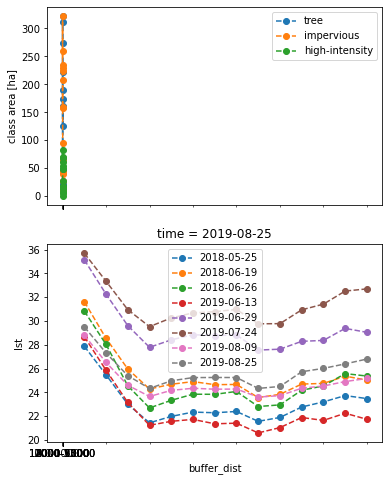

In [8]:
fig = plot_radial_analysis(biophysical_table_filepath, lulc_raster_filepath, t_da_filepath)